In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [70]:
data = pd.read_csv('/home/hasan/DATA SET/EDA/rainfall-in-india/rainfall in india 1901-2015.csv')

In [71]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Data Analysis

Text(0.5, 1.0, 'Annual rail fall from 1901 to 2015')

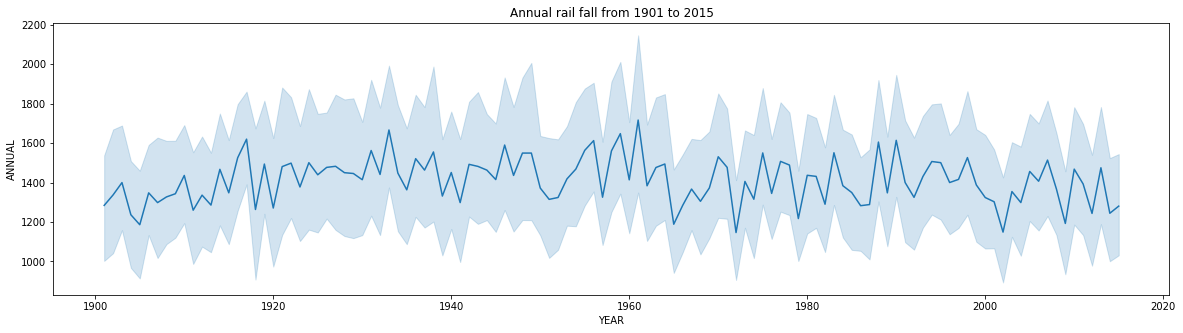

In [72]:
#annual railfall graph
plt.figure(figsize=(20,5))
sns.lineplot(x=data['YEAR'], y=data['ANNUAL'])
plt.title('Annual rail fall from 1901 to 2015')

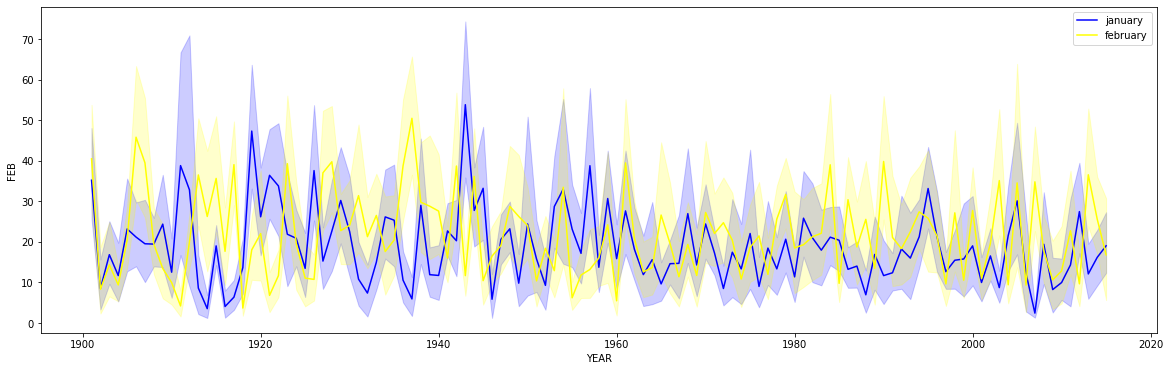

In [73]:
#railfall of January and  in every year
plt.figure(figsize=(20,6))
sns.lineplot(x=data['YEAR'], y=data['JAN'], label='january', color='blue')
sns.lineplot(x=data['YEAR'], y=data['FEB'], label='february', color='yellow')
plt.legend(loc='best')

Text(0.5, 1.0, 'Rainfall of From January to February')

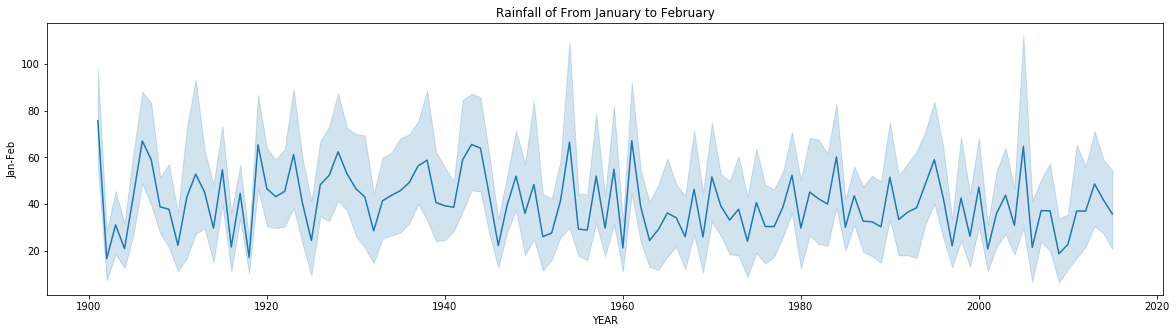

In [74]:
#rainfall of january and february
plt.figure(figsize=(20,5))
sns.lineplot(x=data['YEAR'], y=data['Jan-Feb'])
plt.title('Rainfall of From January to February')

In [75]:
#total rainfall in every month
data_df = data.copy()
sub_data = data_df.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'], axis=1)
sub_data.sum()

JAN      77952.5
FEB      89685.3
MAR     112446.3
APR     177340.0
MAY     352670.9
JUN     946493.8
JUL    1426703.7
AUG    1193563.5
SEP     811157.5
OCT     392438.3
NOV     163650.6
DEC      77482.6
dtype: float64

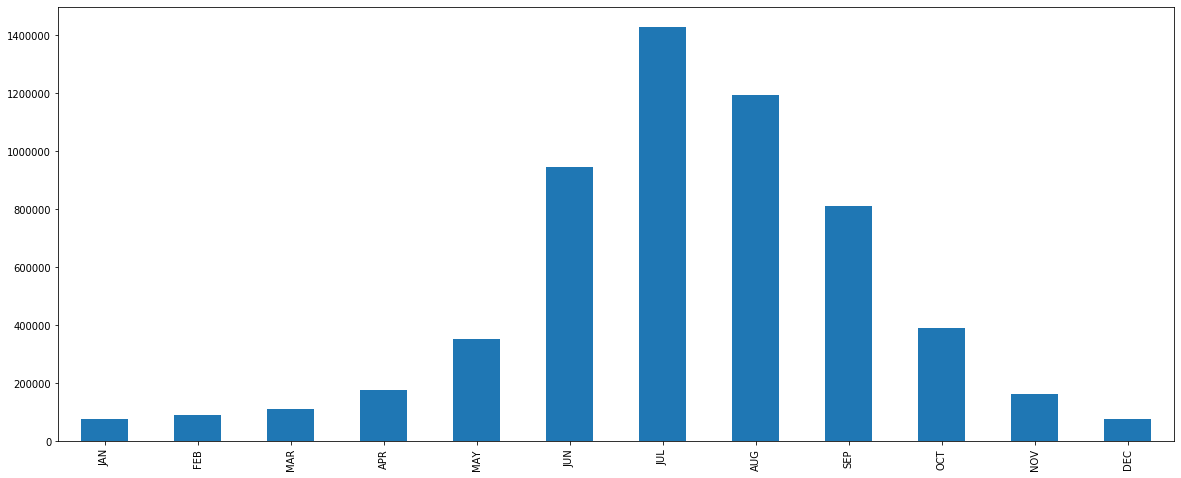

In [76]:
plt.figure(figsize=(20,8))
sub_data.sum().plot(kind='bar')

In [77]:
#total rainfall in 'Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'
data_df = data.copy()
sub_data = data_df.drop(['SUBDIVISION','YEAR','ANNUAL','YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis=1)
sub_data.sum()

Jan-Feb     167473.4
Mar-May     640288.5
Jun-Sep    4371759.9
Oct-Dec     632274.3
dtype: float64

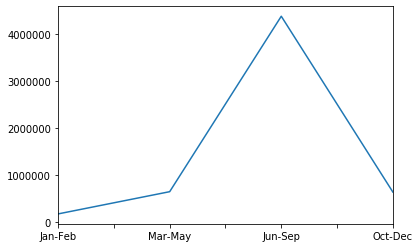

In [78]:
sub_data.sum().plot()

In [79]:
data['SUBDIVISION'].value_counts()

MADHYA MAHARASHTRA                    115
NAGA MANI MIZO TRIPURA                115
KERALA                                115
TAMIL NADU                            115
GANGETIC WEST BENGAL                  115
VIDARBHA                              115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
WEST RAJASTHAN                        115
HARYANA DELHI & CHANDIGARH            115
EAST UTTAR PRADESH                    115
COASTAL KARNATAKA                     115
SOUTH INTERIOR KARNATAKA              115
KONKAN & GOA                          115
ORISSA                                115
NORTH INTERIOR KARNATAKA              115
EAST RAJASTHAN                        115
JAMMU & KASHMIR                       115
BIHAR                                 115
WEST UTTAR PRADESH                    115
RAYALSEEMA                            115
JHARKHAND                             115
EAST MADHYA PRADESH                   115
PUNJAB                                115
CHHATTISGARH                      

In [80]:
tr_rainfall_division = data.groupby('SUBDIVISION')['ANNUAL'].agg('sum')
tr_rainfall_division

SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             304453.7
ARUNACHAL PRADESH                     311116.0
ASSAM & MEGHALAYA                     296780.0
BIHAR                                 137727.9
CHHATTISGARH                          157748.8
COASTAL ANDHRA PRADESH                121084.0
COASTAL KARNATAKA                     388558.7
EAST MADHYA PRADESH                   138575.0
EAST RAJASTHAN                         75349.8
EAST UTTAR PRADESH                    112609.5
GANGETIC WEST BENGAL                  171406.1
GUJARAT REGION                        105596.5
HARYANA DELHI & CHANDIGARH             61007.1
HIMACHAL PRADESH                      144939.7
JAMMU & KASHMIR                       129924.0
JHARKHAND                             150569.9
KERALA                                336431.1
KONKAN & GOA                          342433.9
LAKSHADWEEP                           163861.3
MADHYA MAHARASHTRA                    101226.8
MATATHWADA                             90929.6
N

In [81]:
#8 most rainfall state
most_rainfall_state = tr_rainfall_division.sort_values(ascending=False)
most_rainfall_state.head(8)

SUBDIVISION
COASTAL KARNATAKA                     388558.7
KONKAN & GOA                          342433.9
KERALA                                336431.1
SUB HIMALAYAN WEST BENGAL & SIKKIM    316505.0
ARUNACHAL PRADESH                     311116.0
ANDAMAN & NICOBAR ISLANDS             304453.7
ASSAM & MEGHALAYA                     296780.0
NAGA MANI MIZO TRIPURA                279866.2
Name: ANNUAL, dtype: float64

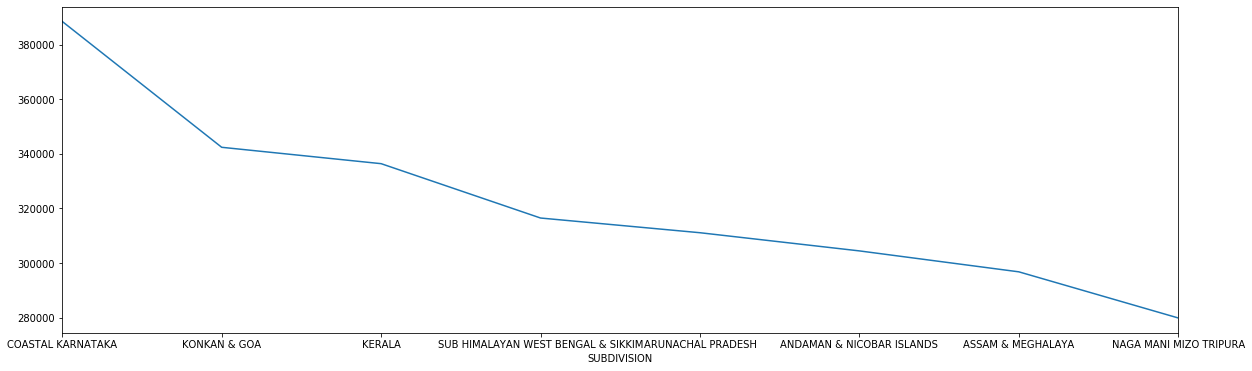

In [82]:
plt.figure(figsize=(20,6))
most_rainfall_state.head(8).plot()

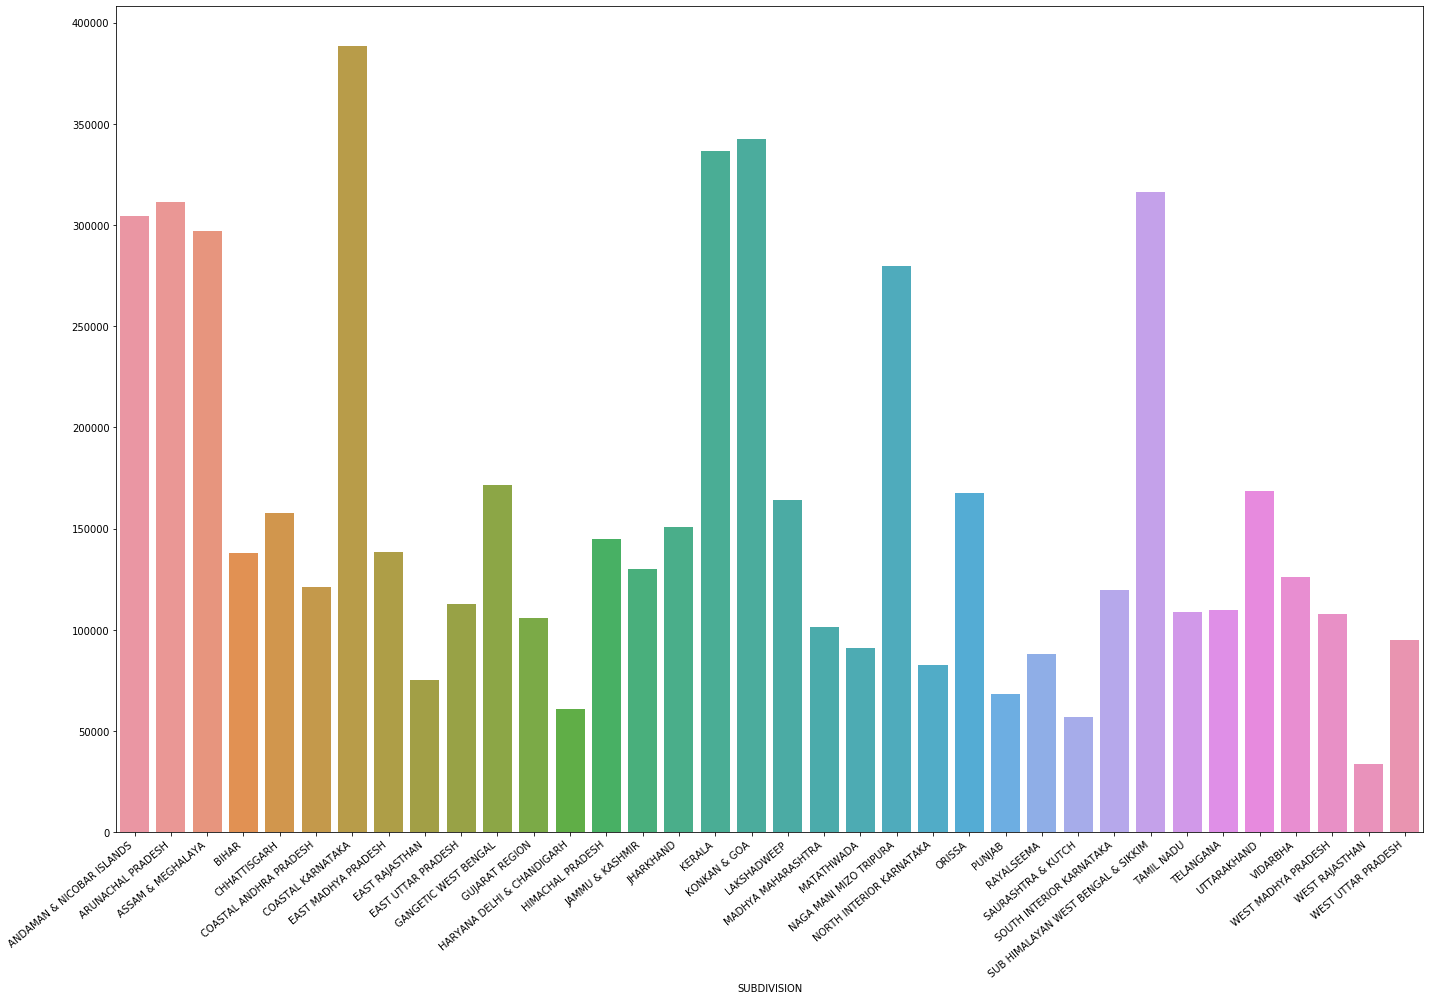

In [83]:
#graph of total rainfall in every state
plt.figure(figsize=(20,14))
tot = sns.barplot(x=tr_rainfall_division.index, y=tr_rainfall_division.values)
tot.set_xticklabels(tot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [84]:
#10 annual rainfall state
most_rain_state = data.sort_values('ANNUAL', ascending=False)
most_rain_state = most_rain_state.loc[:,['SUBDIVISION','ANNUAL','YEAR']]
most_rain_state.head(10)

,SUBDIVISION,ANNUAL,YEAR
142,ARUNACHAL PRADESH,6331.1,1948
132,ARUNACHAL PRADESH,6129.0,1938
115,ARUNACHAL PRADESH,5691.4,1921
3602,COASTAL KARNATAKA,5553.9,1961
112,ARUNACHAL PRADESH,5486.3,1918
122,ARUNACHAL PRADESH,5272.7,1928
121,ARUNACHAL PRADESH,5253.2,1927
149,ARUNACHAL PRADESH,5063.5,1958
155,ARUNACHAL PRADESH,4959.3,1964
143,ARUNACHAL PRADESH,4874.7,1949


In [85]:
#maximum rainfall in every state
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['max','min']).sort_values('max', ascending=False)

,max,min
SUBDIVISION,,
ARUNACHAL PRADESH,6331.1,1668.5
COASTAL KARNATAKA,5553.9,2510.9
NAGA MANI MIZO TRIPURA,4316.2,1353.8
KERALA,4257.8,2068.8
KONKAN & GOA,4000.2,1682.8
ANDAMAN & NICOBAR ISLANDS,3938.2,1849.4
SUB HIMALAYAN WEST BENGAL & SIKKIM,3655.1,1988.2
ASSAM & MEGHALAYA,3403.5,1743.4
LAKSHADWEEP,2361.6,992.6


In [86]:
#mean rainfall in every state
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['mean']).sort_values('mean', ascending=False)

,mean
SUBDIVISION,
ARUNACHAL PRADESH,3418.857143
COASTAL KARNATAKA,3408.409649
KONKAN & GOA,2977.686087
ANDAMAN & NICOBAR ISLANDS,2927.439423
KERALA,2925.487826
SUB HIMALAYAN WEST BENGAL & SIKKIM,2752.217391
ASSAM & MEGHALAYA,2580.695652
NAGA MANI MIZO TRIPURA,2433.619130
LAKSHADWEEP,1590.886408


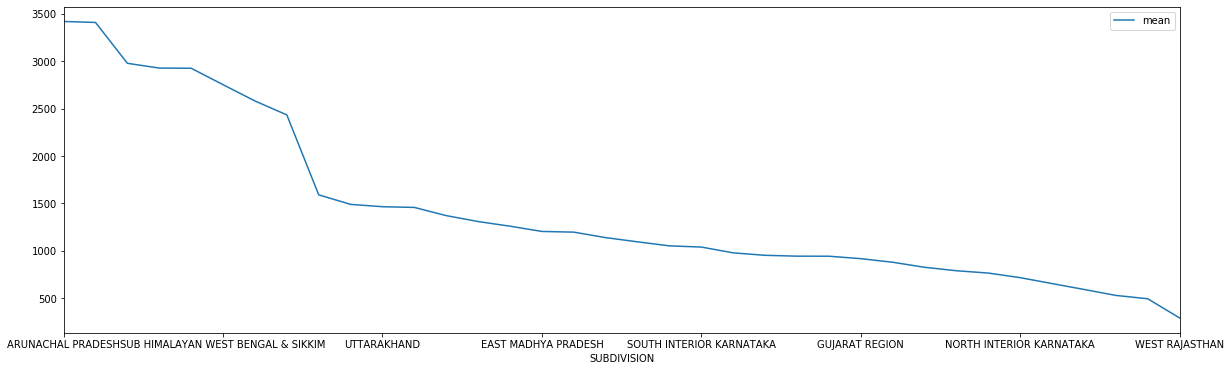

In [87]:
most_rain_state.groupby('SUBDIVISION')['ANNUAL'].agg(['mean']).sort_values('mean', ascending=False).plot(figsize=(20,6))

In [88]:
#rainfall of BIHAR in 1977 in june month
filter_data = data.loc[:,['SUBDIVISION','YEAR','JUN']]
bihar = filter_data[filter_data['SUBDIVISION']=='BIHAR']
bihar[bihar['YEAR']==1977]

,SUBDIVISION,YEAR,JUN
973,BIHAR,1977,102.5


### Analysing only with TELANGANA

In [89]:
telengana = data[data['SUBDIVISION']=='TELANGANA']
telengana

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3197,TELANGANA,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
3198,TELANGANA,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
3199,TELANGANA,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3200,TELANGANA,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
3201,TELANGANA,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,TELANGANA,2011,0.0,11.9,2.6,25.6,9.3,83.9,268.2,225.9,107.6,13.9,4.2,0.0,753.1,11.9,37.4,685.6,18.1
3308,TELANGANA,2012,6.7,0.0,0.2,14.0,8.4,124.4,300.3,229.9,202.4,83.6,38.7,0.0,1008.6,6.7,22.6,857.0,122.3
3309,TELANGANA,2013,2.4,29.0,0.2,24.4,8.5,213.4,453.8,230.6,161.4,205.9,16.4,2.7,1348.7,31.4,33.0,1059.2,225.0
3310,TELANGANA,2014,0.2,2.9,58.3,10.3,73.3,62.3,146.0,205.2,146.8,29.6,10.8,0.7,746.4,3.1,141.9,560.2,41.0


In [90]:
#total rainfall in telengana form 1901 to 2015
telengana['ANNUAL'].sum()

109638.5

In [91]:
#total rainfall from Jan-Feb, Mar-May, Jun-Sep, Oct-Dec
tel_filt = telengana.loc[:,['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
tel_filt.sum()

Jan-Feb     2000.6
Mar-May     6459.9
Jun-Sep    89721.5
Oct-Dec    11456.4
dtype: float64

Text(0, 0.5, 'total rainfall')

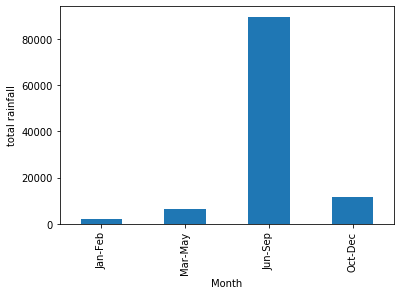

In [92]:
tel_filt.sum().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('total rainfall')

In [93]:
#annual rain of telengana in 1990
filter_tel = telengana.loc[:,['YEAR','ANNUAL']]
filter_tel[filter_tel['YEAR']==1990]

,YEAR,ANNUAL
3286,1990,1425.7


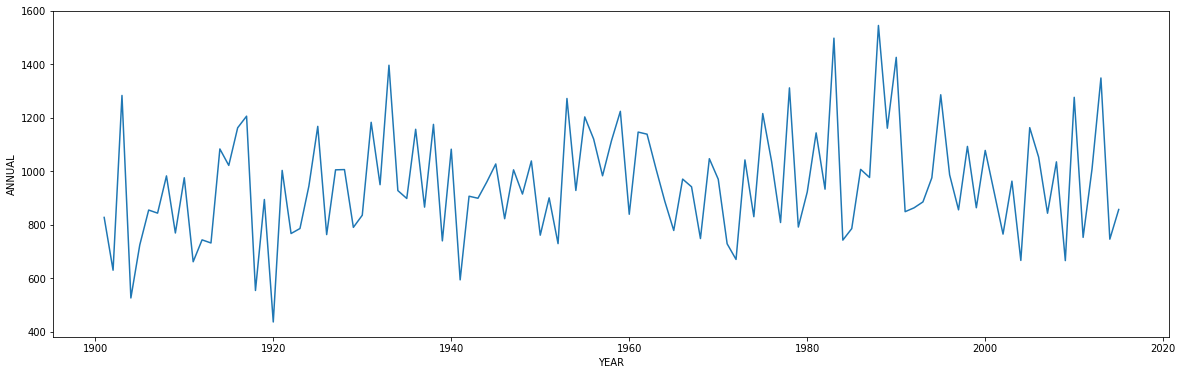

In [94]:
plt.figure(figsize=(20,6))
sns.lineplot(x=telengana['YEAR'], y=telengana['ANNUAL'])

In [95]:
#total rainfall in every month in telengana
telengana_df = telengana.copy()
sub_telengana = telengana_df.drop(['SUBDIVISION','YEAR','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'], axis=1)
sub_telengana.sum()

JAN      885.8
FEB     1114.2
MAR     1450.7
APR     2091.3
MAY     2918.0
JUN    16344.5
JUL    28462.4
AUG    24731.8
SEP    20182.9
OCT     8536.1
NOV     2328.8
DEC      591.3
dtype: float64

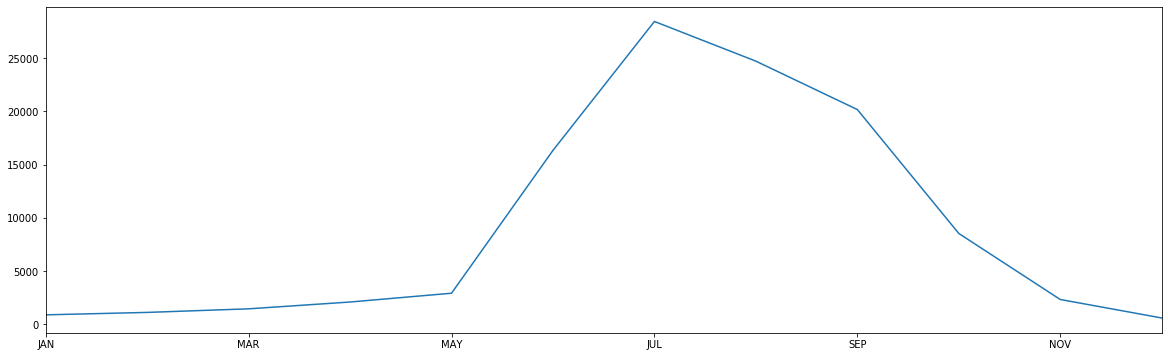

In [96]:
plt.figure(figsize=(20,6))
sub_telengana.sum().plot()

In [97]:
#10 most rainfall year of telengana
most_rainfall_year = telengana.loc[:,['YEAR','ANNUAL']]
most_rainfall_year.sort_values('ANNUAL', ascending=False).head(10)

,YEAR,ANNUAL
3284,1988,1544.9
3279,1983,1497.5
3286,1990,1425.7
3229,1933,1396.3
3309,2013,1348.7
3274,1978,1311.7
3291,1995,1286.0
3199,1903,1283.4
3306,2010,1276.4
3249,1953,1272.1


In [98]:
#5 most rainfall year in January
telengana.loc[:,['YEAR','JAN']].sort_values('JAN', ascending=False).head()

,YEAR,JAN
3291,1995,98.7
3218,1922,55.3
3222,1926,46.1
3301,2005,43.4
3220,1924,37.0


In [99]:
#5 most rainfall year from june to september
telengana.loc[:,['YEAR','Jun-Sep']].sort_values('Jun-Sep', ascending=False).head()

,YEAR,Jun-Sep
3284,1988,1447.2
3279,1983,1255.4
3274,1978,1130.8
3255,1959,1128.0
3285,1989,1087.6


### Feature Engineering

In [100]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [101]:
data.shape

(4116, 19)

In [102]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [103]:
#checking null value

In [104]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [105]:
#filling nan value using SimpleImputer
sm = SimpleImputer(missing_values=np.nan, strategy='mean')
sm.fit(data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]=sm.transform(data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])


In [106]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [107]:
group = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data = group.get_group('BIHAR')
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901.0,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902.0,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903.0,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904.0,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905.0,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,2011.0,4.2,7.7,9.2,23.9,74.5,211.0,241.1,278.7,234.1,2.0,0.9
1008,2012.0,18.1,2.7,7.3,20.4,18.8,96.2,354.0,240.4,233.8,6.4,0.0
1009,2013.0,5.1,22.6,0.6,32.3,89.5,183.3,182.0,213.6,143.3,0.4,0.0
1010,2014.0,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,0.0,1.2


In [108]:
data = data.melt(['YEAR']).reset_index()   #Pandas.melt() unpivots a DataFrame from wide format to long format.
data

,index,YEAR,variable,value
0,0,1901.0,JAN,51.8
1,1,1902.0,JAN,4.6
2,2,1903.0,JAN,5.3
3,3,1904.0,JAN,6.3
4,4,1905.0,JAN,16.0
...,...,...,...,...
1260,1260,2011.0,DEC,0.9
1261,1261,2012.0,DEC,0.0
1262,1262,2013.0,DEC,0.0
1263,1263,2014.0,DEC,1.2


In [109]:
data = data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
data.head()

,index,YEAR,variable,value
0,0,1901.0,JAN,51.8
115,115,1901.0,FEB,19.6
230,230,1901.0,MAR,11.9
345,345,1901.0,APR,1.1
460,460,1901.0,MAY,65.6


In [110]:
data.columns = ['INDEX','YEAR','Month','avg_rainfall']
data.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901.0,JAN,51.8
115,115,1901.0,FEB,19.6
230,230,1901.0,MAR,11.9
345,345,1901.0,APR,1.1
460,460,1901.0,MAY,65.6


In [111]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
data['Month']=data['Month'].map(d)
data.head(12)


,INDEX,YEAR,Month,avg_rainfall
0,0,1901.0,1,51.8
115,115,1901.0,2,19.6
230,230,1901.0,3,11.9
345,345,1901.0,4,1.1
460,460,1901.0,5,65.6
575,575,1901.0,6,66.3
690,690,1901.0,7,245.9
805,805,1901.0,8,319.4
920,920,1901.0,9,155.1
1035,1035,1901.0,11,7.3


In [112]:
data['Day'] = pd.to_datetime(data.assign(Day=1).loc[:,['YEAR','Month','Day']])
data.head(12)

,INDEX,YEAR,Month,avg_rainfall,Day
0,0,1901.0,1,51.8,1901-01-01
115,115,1901.0,2,19.6,1901-02-01
230,230,1901.0,3,11.9,1901-03-01
345,345,1901.0,4,1.1,1901-04-01
460,460,1901.0,5,65.6,1901-05-01
575,575,1901.0,6,66.3,1901-06-01
690,690,1901.0,7,245.9,1901-07-01
805,805,1901.0,8,319.4,1901-08-01
920,920,1901.0,9,155.1,1901-09-01
1035,1035,1901.0,11,7.3,1901-11-01


In [113]:
col = ['avg_rainfall']
dataset = data[col]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [114]:
dataset.shape

(1265, 1)

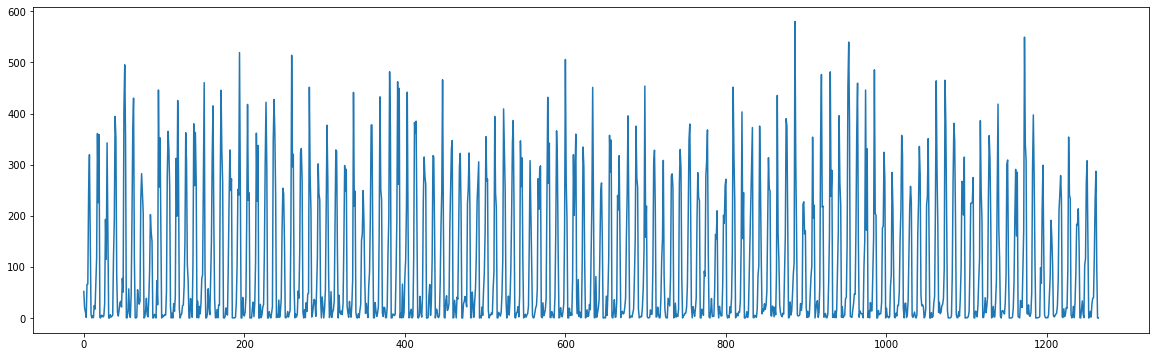

In [115]:
plt.figure(figsize=(20,6))
plt.plot(dataset.values)
plt.show()

In [116]:
dataset = dataset.values.astype('float32')

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [118]:
train_size = 0.80

train_size = int(len(dataset)*train_size)
test_size = len(dataset)-train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print('Shape of train :',train.shape)
print('Shape of test :',test.shape)

Shape of train : (1012, 1)
Shape of test : (253, 1)


In [119]:
#I could do it using shift function
def create_dataset(dataset, window_size=1):
    x_data, y_data = [],[]
    
    for i in range(len(dataset)- window_size-1):
        a=dataset[i:(i+window_size),0]
        x_data.append(a)
        y_data.append(dataset[i+window_size,0])
    return (np.array(x_data), np.array(y_data))


window_size=1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape :",train_X.shape)
print('New test data shape :',train_Y.shape)
print("Original training data shape :",test_X.shape)
print('New test data shape :',test_Y.shape)

Original training data shape : (1010, 1)
New test data shape : (1010,)
Original training data shape : (251, 1)
New test data shape : (251,)


In [120]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X is :", train_X.shape)
print('Shape of test_X is :',test_X.shape)


Shape of train_X is : (1010, 1, 1)
Shape of test_X is : (251, 1, 1)


# Model

In [121]:
model = Sequential()
model.add(LSTM(2000,activation = 'tanh', inner_activation = 'hard_sigmoid', input_shape = (1, window_size)))
model.add(Dropout(0.2))
model.add(Dense(500))
model.add(Dropout(0.4))
model.add(Dense(500))
model.add(Dropout(0.4))
model.add(Dense(400))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'linear'))

/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(2000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  


In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 2000)              16016000  
_________________________________________________________________
dropout_5 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)              

In [123]:
model.compile(loss = "mean_squared_error", 
              optimizer = "adam")

In [125]:
model.fit(train_X, train_Y,epochs=20, batch_size=64)

Epoch 1/20
1010/1010 [==============================] - 6s 6ms/step - loss: 0.0375
Epoch 2/20
1010/1010 [==============================] - 7s 6ms/step - loss: 0.0368
Epoch 3/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0368
Epoch 4/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0373
Epoch 5/20
1010/1010 [==============================] - 6s 6ms/step - loss: 0.0362
Epoch 6/20
1010/1010 [==============================] - 7s 6ms/step - loss: 0.0397
Epoch 7/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0366
Epoch 8/20
1010/1010 [==============================] - 7s 6ms/step - loss: 0.0371
Epoch 9/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0363
Epoch 10/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0388
Epoch 11/20
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0358
Epoch 12/20
1010/1010 [==============================] - 7s 6ms/step - loss: 0.0362
E

In [126]:
import math
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 106.88 RMSE
Test data score: 94.01 RMSE


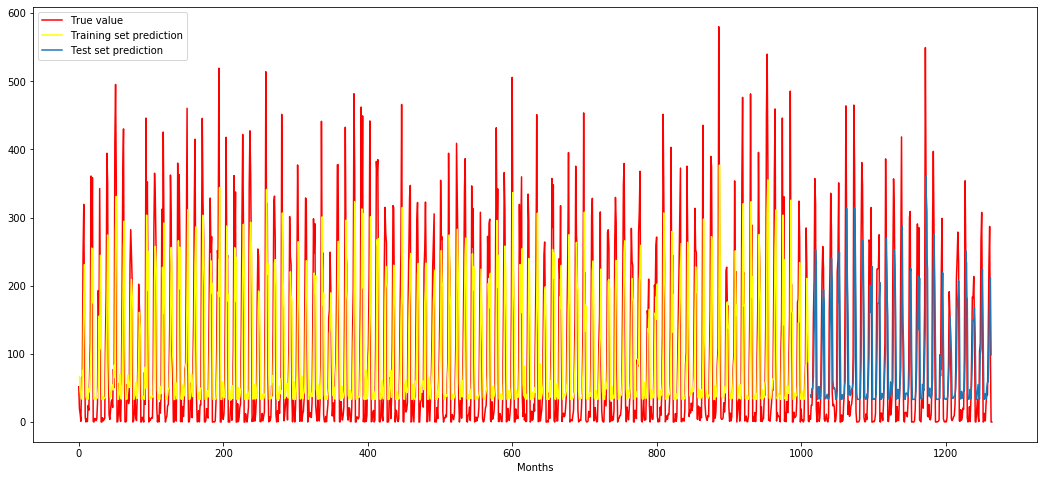

In [127]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict


# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.legend()
plt.show()


In [128]:
#test predicted data
test_predict

array([[ 39.295197],
       [ 35.771313],
       [ 49.115467],
       [ 49.115467],
       [ 66.29472 ],
       [131.8154  ],
       [165.2087  ],
       [253.19118 ],
       [231.47914 ],
       [ 45.739223],
       [ 33.22235 ],
       [ 51.578995],
       [ 52.09726 ],
       [ 33.81087 ],
       [ 37.729805],
       [ 54.427624],
       [116.91878 ],
       [170.44026 ],
       [194.50827 ],
       [175.77734 ],
       [ 36.032555],
       [ 33.94163 ],
       [ 37.5993  ],
       [ 40.729034],
       [ 34.46457 ],
       [ 33.22235 ],
       [ 37.53405 ],
       [136.8364  ],
       [176.38277 ],
       [240.6532  ],
       [207.33868 ],
       [ 61.982002],
       [ 48.661304],
       [ 50.088287],
       [ 47.298206],
       [ 33.28776 ],
       [ 35.11805 ],
       [ 45.024265],
       [171.89745 ],
       [183.02881 ],
       [249.48634 ],
       [136.58879 ],
       [ 33.156944],
       [ 33.156944],
       [ 40.01225 ],
       [ 33.876247],
       [ 35.052708],
       [ 52.2

In [133]:
#train predicted data
train_predict

array([[ 66.74474 ],
       [ 45.934155],
       [ 40.924477],
       ...,
       [210.72385 ],
       [171.35117 ],
       [ 88.53946 ]], dtype=float32)